In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
data = pd.read_csv('housing.csv')

In [2]:
data.isnull().any().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008CB1A08>,
      dtype=object)

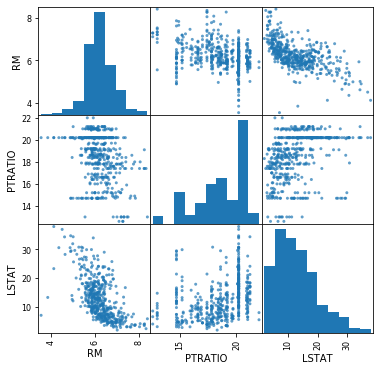

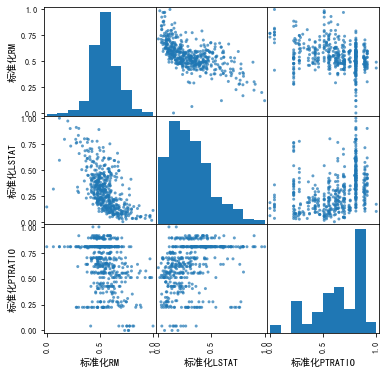

In [3]:
features = data[['RM', 'PTRATIO', 'LSTAT']]
pd.plotting.scatter_matrix(features, alpha=0.7, figsize=(6,6), diagonal='hist')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for feature in features.columns:
    features['标准化'+feature] = scaler.fit_transform(features[[feature]])

#散点可视化，查看特征归一化后的数据
font={
      'family':'SimHei'
      }
matplotlib.rc('font', **font)
pd.plotting.scatter_matrix(features[['标准化RM', '标准化LSTAT', '标准化PTRATIO']], alpha=0.7, figsize=(6,6), diagonal='hist')

In [4]:
#将数据拆分为训练数据及测试数据
y = data[['MEDV']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features[['标准化RM', '标准化PTRATIO', '标准化LSTAT']], y, test_size=0.3,random_state=33)
#采用交叉验证的方法对模型进行评估
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [5]:
#SVR_rbf
from sklearn.svm import SVR
rbf_svr = SVR(kernel = 'rbf')
rbf_svr_predict = cross_val_predict(rbf_svr, x_train, y_train, cv=5)
rbf_svr_score = cross_val_score(rbf_svr, x_train, y_train, cv=5)
rbf_svr_meanscore = rbf_svr_score.mean()

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma exp

Text(0, 0.5, 'mean-score')

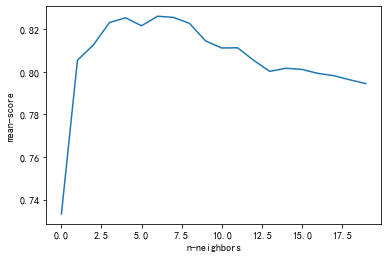

In [6]:
#KNN模型预测房价
from sklearn.neighbors import KNeighborsRegressor
score=[]
for n_neighbors in range(1,21):
    knn = KNeighborsRegressor(n_neighbors, weights = 'uniform' )
    knn_predict = cross_val_predict(knn, x_train, y_train, cv=5)
    knn_score = cross_val_score(knn, x_train, y_train, cv=5)
    knn_meanscore = knn_score.mean()
    score.append(knn_meanscore)
plt.plot(score)
plt.xlabel('n-neighbors')
plt.ylabel('mean-score')

In [7]:
#随着n_neighbors的逐渐增大，模型预测能力逐渐增强，但是当n_neighbors大于2以后，模型评分趋于下降。因此我们选取n_neighbors=2
n_neighbors=2
knn = KNeighborsRegressor(n_neighbors, weights = 'uniform' )
knn_predict = cross_val_predict(knn, x_train, y_train, cv=5)
knn_score = cross_val_score(knn, x_train, y_train, cv=5)
knn_meanscore = knn_score.mean()#随着n_neighbors的逐渐增大，模型预测能力逐渐增强，但是当n_neighbors大于2以后，模型评分趋于下降。因此我们选取n_neighbors=2
n_neighbors=2
knn = KNeighborsRegressor(n_neighbors, weights = 'uniform' )
knn_predict = cross_val_predict(knn, x_train, y_train, cv=5)
knn_score = cross_val_score(knn, x_train, y_train, cv=5)
knn_meanscore = knn_score.mean()

In [8]:
#模型评估
evaluating = {
        'knn':knn_score,
        'rbf_svr':rbf_svr_score,
        }
evaluating = pd.DataFrame(evaluating)

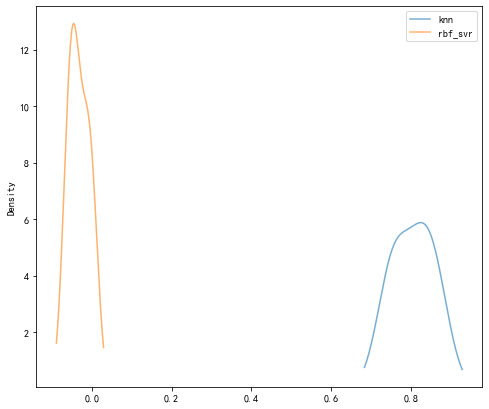

In [9]:
#可视化
evaluating.plot.kde(alpha=0.6,figsize=(8,7))

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

Text(0, 0.5, 'score')

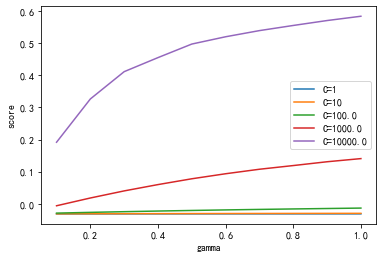

In [10]:
#‘rbf'核优化，优化惩罚系数C和gamma
for i in [1,10,1e2,1e3,1e4]:
    rbfSVR_score=[]
    for j in np.linspace(0.1,1,10):
        rbf_svr = SVR(kernel = 'rbf', C=i, gamma=j)
        rbf_svr_predict = cross_val_predict(rbf_svr, x_train, y_train, cv=5)
        rbf_svr_score = cross_val_score(rbf_svr, x_train, y_train, cv=5)
        rbf_svr_meanscore = rbf_svr_score.mean()
        rbfSVR_score.append(rbf_svr_meanscore)
    plt.plot(np.linspace(0.1,1,10),rbfSVR_score,label='C='+str(i))
    plt.legend()
plt.xlabel('gamma')
plt.ylabel('score')

In [11]:
rbf_svr = SVR(kernel = 'rbf', C=100, gamma=0.5)
rbf_svr_predict = cross_val_predict(rbf_svr, x_train, y_train, cv=5)
rbf_svr_score = cross_val_score(rbf_svr, x_train, y_train, cv=5)
rbf_svr_meanscore = rbf_svr_score.mean()

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

In [12]:
#测试数据集进行预测
#knn
knn.fit(x_train,y_train)
knn_y_predict = knn.predict(x_test)
knn_y_predict_score = knn.score(x_test, y_test)
#svr
rbf_svr.fit(x_train,y_train)
rbf_svr_y_predict = rbf_svr.predict(x_test)
rbf_svr_y_predict_score=rbf_svr.score(x_test, y_test)
predict_score = {
        'knn':knn_y_predict_score,
        'rbf_svr':rbf_svr_y_predict_score,
        }
predict_score = pd.DataFrame(predict_score, index=['score']).transpose()
predict_score.sort_values(by='score',ascending = False)

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,score
knn,0.693957
rbf_svr,0.012192
